In [ ]:
Le clustering hiérarchique est un type d'algorithme d'apprentissage automatique non supervisé
utilisé pour regrouper des points de données non étiquetés. Comme le clustering K-means,le 
clustering hiérarchique regroupe également les points de données ayant des caractéristiques 
similaires. Dans certains cas, le résultat du clustering hiérarchique et K-Means peut être 
similaire. Avant d'implémenter le clustering hiérarchique à l'aide de Scikit-Learn, 
commençons par comprendre la théorie derrière le clustering hiérarchique.

##Théorie du clustering hiérarchique

Il existe deux types de clustering hiérarchique : Agglomerative et Divisive. Dans le 
premier cas, les points de données sont regroupés à l'aide d'une approche ascendante 
commençant par des points de données individuels, tandis que dans la seconde, une approche 
descendante est suivie où tous les points de données sont traités comme un seul grand groupe 
et le processus de regroupement implique de diviser le seul grand se regrouper en plusieurs 
petits amas.

Dans cet article, nous nous concentrerons sur le clustering agglomératif qui implique 
l'approche ascendante.


##Étapes pour effectuer un clustering hiérarchique


Voici les étapes impliquées dans le regroupement agglomératif :

1- Au début,traitez chaque point de données comme un cluster. Par conséquent, le nombre de 
clusters au départ sera K, tandis que K est un entier représentant le nombre de points de 
données.
2- Formez un cluster en joignant les deux points de données les plus proches, ce qui donne 
des clusters K-1.
3- Formez plus de grappes en joignant les deux grappes les plus proches, ce qui donne 
des grappes K-2.
4- Répétez les trois étapes ci-dessus jusqu'à ce qu'un gros cluster soit formé.
5- Une fois qu'un seul cluster est formé, les dendrogrammes sont utilisés pour se diviser 
en plusieurs clusters en fonction du problème. Nous étudierons en détail le concept de 
dendrogramme dans une prochaine section.

Il existe différentes façons de trouver la distance entre les clusters. La distance 
elle-même peut être la distance euclidienne ou la distance de Manhattan. Voici quelques-unes 
des options pour mesurer la distance entre deux clusters :

1- Mesurez la distance entre les points de fermeture de deux clusters.
2- Mesurer la distance entre les points les plus éloignés de deux clusters.
3- Mesurez la distance entre les centroïdes de deux clusters.
4- Mesurez la distance entre toutes les combinaisons possibles de points entre les deux 
clusters et prenez la moyenne.


## Rôle des dendrogrammes pour le clustering hiérarchique


Dans la dernière section, nous avons dit qu'une fois qu'un grand cluster est formé par la 
combinaison de petits clusters, les dendrogrammes du cluster sont utilisés pour diviser le 
cluster en plusieurs clusters de points de données liés. Voyons comment c'est réellement fait.

Supposons que nous ayons une collection de points de données représentés par un numpytableau 
comme suit :

In [1]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

In [2]:
Traçons les points de données ci-dessus. Pour ce faire, exécutez le code suivant :


SyntaxError: invalid syntax (<ipython-input-2-d7cf5ac5e48b>, line 1)

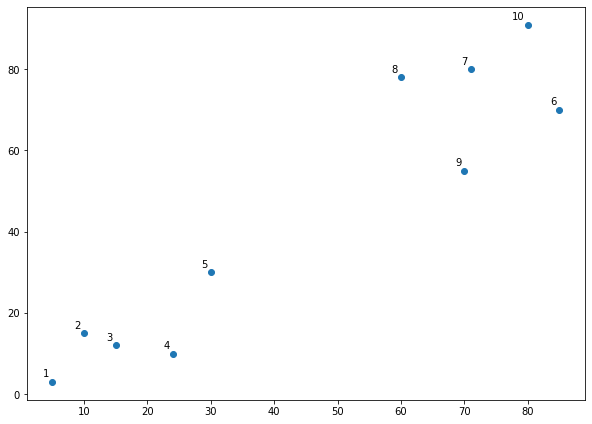

In [3]:
import matplotlib.pyplot as plt

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()


In [ ]:
The script above draws the data points in the X numpy array and label data points from 1 to 
10. In the image below you'll see that the plot that is generated from this code:

## image


In [ ]:
Appelons le tracé ci-dessus Graph1. On peut voir à l'œil nu que les points de données forment
deux groupes : le premier en bas à gauche composé des points 1-5 tandis que le second en haut 
à droite composé des points 6-10.

Cependant, dans le monde réel, nous pouvons avoir des milliers de points de données dans bien 
plus de 2 dimensions. Dans ce cas, il ne serait pas possible de repérer les grappes à l'œil 
nu. C'est pourquoi des algorithmes de clustering ont été développés.

Revenant à l'utilisation des dendrogrammes dans le regroupement hiérarchique, dessinons les 
dendrogrammes pour nos points de données. Nous utiliserons la bibliothèque scipy à cette fin. 
Exécutez le script suivant :

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()


In [ ]:
Le graphique de sortie ressemble à celui ci-dessous. Appelons ce graphique Graph2.

## image du graphe (Diagramme de dendrogramme)

 

In [ ]:

L'algorithme commence par trouver les deux points les plus proches l'un de l'autre sur la 
base de la distance euclidienne. Si nous regardons le graphique 1, nous pouvons voir que les 
points 2 et 3 sont les plus proches l'un de l'autre tandis que les points 7 et 8 sont proches 
l'un de l'autre. Par conséquent, un cluster se formera d'abord entre ces deux points. Dans 
Graph2, vous pouvez voir que les dendogrammes ont été créés en joignant les points 2 avec 3 
et 8 avec 7. La hauteur verticale du dendogramme montre les distances euclidiennes entre les 
points. D'après le graphique 2, on peut voir que la distance euclidienne entre 
les points 8 et 7 est supérieure à la distance entre les points 2 et 3.



In [ ]:
L'étape suivante consiste à rejoindre le cluster formé en joignant deux points au cluster ou 
au point le plus proche qui à son tour donne un autre cluster. Si vous regardez Graph1, le 
point 4 est le plus proche du groupe de points 2 et 3, donc dans Graph2 le dendrogramme est 
généré en joignant le point 4 avec le dendrogramme des points 2 et 3. Ce processus se 
poursuit jusqu'à ce que tous les points soient réunis pour former un grand groupe.

Une fois qu'un grand groupe est formé, la distance verticale la plus longue sans aucune ligne 
horizontale la traversant est sélectionnée et une ligne horizontale est tracée à travers elle.
Le nombre de lignes verticales traversées par cette ligne horizontale nouvellement créée est 
égal au nombre de clusters. Jetez un oeil à l'intrigue suivante:

##graphique


Nous pouvons voir que la plus grande distance verticale sans qu'aucune ligne horizontale ne 
la traverse est représentée par une ligne bleue. Nous traçons donc une nouvelle ligne rouge 
horizontale qui passe par la ligne bleue. Puisqu'il croise la ligne bleue en deux points, le 
nombre de clusters sera donc de 2.


Fondamentalement, la ligne horizontale est un seuil, qui définit la distance minimale requise 
pour être un cluster séparé. Si nous traçons une ligne plus bas, le seuil requis pour être 
un nouveau cluster sera diminué et plus de clusters seront formés comme le montre l'image 
ci-dessous :
    
    #graphique
    
Dans le graphique ci-dessus, la ligne horizontale passe par quatre lignes verticales, ce qui 
donne quatre groupes : le groupe de points 6, 7, 8 et 10, le groupe de points 3, 2, 4 et les 
points 9 et 5 seront traités comme des groupes de points uniques.



In [ ]:
##Clustering hiérarchique via Scikit-Learn



In [ ]:
Assez de théorie, implémentons maintenant le clustering hiérarchique à l'aide de 
la bibliothèque Scikit-Learn de Python.

Exemple 1

Dans notre premier exemple, nous regrouperons le X numpytableau de points de données que 
nous avons créé dans la section précédente.

Le processus de clustering est similaire à tout autre algorithme d'apprentissage automatique 
non supervisé. Nous commençons par importer les bibliothèques requises :



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np



In [ ]:
L'étape suivante consiste à importer ou à créer l'ensemble de données. Dans cet exemple, 
nous 
utiliserons les exemples de données suivants :



In [ ]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])



In [ ]:
L'étape suivante consiste à importer la classe pour le clustering et à appeler sa 
fit_predictméthode pour prédire les clusters auxquels appartient chaque point de données.

Jetez un oeil au script suivant :

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)


In [ ]:

Dans le code ci-dessus, nous importons la AgglomerativeClusteringclasse de la bibliothèque 
"sklearn.cluster". Le nombre de paramètres est défini sur 2 à l'aide du n_clustersparamètre 
tandis que le affinityest défini sur "euclidienne" (distance entre les points de données). 
Enfin linkage, le paramètre est défini sur "ward", ce qui minimise la variante entre 
les clusters.

Ensuite, nous appelons la fit_predictméthode à partir de la AgglomerativeClusteringvariable 
de classe cluster. Cette méthode renvoie les noms des clusters auxquels appartient chaque 
point de données. Exécutez le script suivant pour voir comment les points de données 
ont été regroupés.



In [ ]:
print(cluster.labels_)


In [ ]:
La sortie est un tableau unidimensionnel de 10 éléments correspondant aux clusters affectés
à nos 10 points de données.

[1 1 1 1 1 0 0 0 0]



In [ ]:
Comme prévu, les cinq premiers points ont été regroupés tandis que les cinq derniers points 
ont été regroupés. Il est important de mentionner ici que ces uns et ces zéros ne sont que 
des étiquettes attribuées aux clusters et n'ont aucune implication mathématique.

Enfin, traçons nos clusters. Pour ce faire, exécutez le code suivant :


In [ ]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [ ]:
## Tracé de points de données en couleur

In [ ]:
Vous pouvez voir des points dans deux clusters où les cinq premiers points se sont regroupés 
et les cinq derniers points se sont regroupés.


In [ ]:
Exemple 2
Dans la dernière section, nous avons effectué un clustering hiérarchique sur des données 
fictives. Dans cet exemple, nous allons effectuer un clustering hiérarchique sur des données 
du monde réel et voir comment il peut être utilisé pour résoudre un problème réel.

Le problème que nous allons résoudre dans cette section est de segmenter les clients en 
différents groupes en fonction de leurs tendances d'achat.

L'ensemble de données pour ce problème peut être téléchargé à partir du lien suivant :
shopping-data.csv

Placez le fichier "shopping-data.csv" téléchargé dans le dossier "Datasets" du répertoire 
"D". Pour regrouper ces données en groupes, nous suivrons les mêmes étapes que celles que 
nous avons effectuées dans la section précédente.

Exécutez le script suivant pour importer les bibliothèques souhaitées :

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [ ]:
Ensuite, pour importer l'ensemble de données de cet exemple, exécutez le code suivant :


In [ ]:
customer_data = pd.read_csv('D:\Datasets\shopping-data.csv')

In [ ]:
Explorons un peu notre jeu de données. Pour vérifier le nombre d'enregistrements et 
d'attributs, exécutez le script suivant :


In [ ]:
customer_data.shape

In [ ]:
Le script ci-dessus renverra (200, 5)ce qui signifie que l'ensemble de données contient 200 
enregistrements et 5 attributs.

Pour observer l'ensemble de données, exécutez la head()fonction de la trame de données. 
Jetez un oeil au script suivant :


In [ ]:
customer_data.head()

In [ ]:
La sortie ressemblera à ceci :

N ° de client	Le genre	Âge	Revenu annuel (k$)	Score de dépenses (1-100)
0	1	Homme	19	15	39
1	2	Homme	21	15	81
2	3	Femelle	20	16	6
3	4	Femelle	23	16	77
4	5	Femelle	31	17	40


In [ ]:
Notre ensemble de données comporte cinq colonnes : CustomerID, Genre, Age, Annual Income et 
Spending Score. Pour visualiser les résultats dans un espace bidimensionnel, nous ne 
retiendrons que deux de ces cinq colonnes. Nous pouvons supprimer les colonnes 
CustomerID, Genre et Age. Nous conserverons les colonnes Revenu annuel (en milliers de 
dollars) et Score de dépenses (1-100). La colonne Score de dépense indique la fréquence à 
laquelle une personne dépense de l'argent dans un centre commercial sur une échelle de 
1 à 100, 100 étant le plus dépensier. Exécutez le script suivant pour filtrer les trois 
premières colonnes de notre ensemble de données:


In [ ]:
data = customer_data.iloc[:, 3:5].values

In [ ]:
Ensuite, nous devons connaître les clusters dans lesquels nous voulons que nos données soient
divisées. Nous utiliserons à nouveau la scipybibliothèque pour créer les dendrogrammes de 
notre ensemble de données. Exécutez le script suivant pour ce faire :


In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))


In [ ]:
Dans le script ci-dessus, nous importons la classe hiérarchique de la 
scipy.clusterbibliothèque en tant que shc. La classe de hiérarchie a une dendrogramméthode 
qui prend la valeur renvoyée par la linkageméthode de la même classe. La linkageméthode prend
le jeu de données et la méthode pour minimiser les distances comme paramètres. Nous utilisons
'ward' comme methodcar il minimise alors les variantes de distances entre les clusters.

La sortie du script ci-dessus ressemble à ceci :
    ## graphe


In [ ]:
Si nous traçons une ligne horizontale qui traverse la distance la plus longue sans ligne 
horizontale, nous obtenons 5 clusters comme indiqué dans la figure suivante :
    
    ###graphe
Maintenant que nous connaissons le nombre de clusters pour notre ensemble de données, l'étape
suivante consiste à regrouper les points de données dans ces cinq clusters. Pour ce faire, 
nous utiliserons à nouveau la AgglomerativeClusteringclasse de 
la sklearn.clusterbibliothèque. Jetez un oeil au script suivant :


In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

In [ ]:
La sortie du script ci-dessus ressemble à ceci :

 array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2], dtype=int64)



In [ ]:
Vous pouvez voir les étiquettes de cluster de tous vos points de données. Comme nous avions 
cinq clusters, nous avons cinq étiquettes dans la sortie, c'est-à-dire de 0 à 4.

Enfin, traçons les clusters pour voir comment nos données ont été regroupées :

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

In [ ]:
La sortie du code ci-dessus ressemble à ceci:
    
    ## graphe
Vous pouvez voir les points de données sous la forme de cinq clusters. Les points de données 
en bas à droite appartiennent aux clients avec des salaires élevés mais de faibles dépenses. 
Ce sont les clients qui dépensent leur argent avec précaution. De même, les clients en haut à
droite (points de données verts), ce sont les clients avec des salaires élevés et des 
dépenses élevées. C'est le type de clients que les entreprises ciblent. Les clients du milieu
(points de données bleus) sont ceux qui ont un revenu moyen et des salaires moyens. Les plus 
grands nombres de clients appartiennent à cette catégorie. Les entreprises peuvent également 
cibler ces clients compte tenu du fait qu'ils sont très nombreux, etc.
   

In [ ]:
##Ressources

In [ ]:
Entre tous les différents packages Python ( pandas, matplotlib, numpy, et sklearn), il y a 
beaucoup d'informations dans cet article qui pourraient être difficiles à suivre, et pour 
cette raison, nous vous recommandons de consulter des ressources plus détaillées sur 
l'exécution de tâches de science des données avec Python, telles que sous forme de cours en 
ligne :

. Science des données en Python, Pandas, Scikit-learn, Numpy, Matplotlib
. Bootcamp Python pour la science des données et l'apprentissage automatique
. Machine Learning AZ : Python et R pratiques en science des données
    
Nous avons constaté que ces ressources sont suffisamment bonnes pour que vous repartiez avec 
une solide compréhension de la façon de les utiliser dans votre propre travail.

In [ ]:
################  CONCLUSION   ################################

In [ ]:
La technique de clustering peut être très pratique lorsqu'il s'agit de données non 
étiquetées. Étant donné que la plupart des données du monde réel ne sont pas étiquetées et 
que l'annotation des données a des coûts plus élevés, des techniques de regroupement peuvent 
être utilisées pour étiqueter les données non étiquetées.

Dans cet article, nous avons expliqué le clustering hiérarchique à l'aide de deux exemples. 
Pour plus d'articles sur l'apprentissage automatique et la science des données, continuez à 
visiter ce site. 
